In [1]:
# Combine CSVs
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df1 = pd.read_csv('2014.csv')
df2 = pd.read_csv('2015.csv')
df3 = pd.read_csv('2016.csv')
df4 = pd.read_csv('2018.csv')
df5 = pd.read_csv('2019.csv')
df6 = pd.read_csv('2020.csv')
df7 = pd.read_csv('2021.csv')
l1 = df1.shape[0]
l2 = df2.shape[0] + l1
l3 = df3.shape[0] + l2
l4 = df4.shape[0] + l3
l5 = df5.shape[0] + l4
l6 = df6.shape[0] + l5
l7 = df7.shape[0] + l6
#df1.shape[0]+df2.shape[0]+df3.shape[0]+df4.shape[0]+df5.shape[0]+df6.shape[0]+df7.shape[0]
def preProcess(df):
    df = df.astype(str)
    def remove_rs(value):
        value = value.replace('Rs. ','')
        value = value.replace(',','')
        return value
    df['total'] = df['total'].apply(remove_rs)
    df['total'] = df['total'].astype(float)
    df['postage'] = df['postage'].apply(remove_rs)
    df['postage'] = df['postage'].astype(float)
    df['gift'] = df['gift'].apply(remove_rs)
    df['gift'] = df['gift'].astype(float)
    df['VAT'] = df['VAT'].apply(remove_rs)
    df['VAT'] = df['VAT'].astype(float)
    return df
df1 = preProcess(df1)
df2 = preProcess(df2)
df3 = preProcess(df3)
df4 = preProcess(df4)
df5 = preProcess(df5)
df6 = preProcess(df6)
df7 = preProcess(df7)
df = pd.concat([df1,df2,df3,df4,df5,df6,df7], ignore_index=True)
#df = preProcess(df)
df.to_csv('total.csv')
total = df['total']

In [2]:
mean = (df['total'].to_frame()).mean()
tax = df['postage'] + df['VAT'] + df['gift']
print(total.describe())
print()
print(tax.describe())

count      116.000000
mean       873.795862
std       1625.067723
min        107.100000
25%        270.250000
50%        479.000000
75%        822.750000
max      14999.000000
Name: total, dtype: float64

count    116.000000
mean      11.254310
std       22.364908
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       96.000000
dtype: float64


<Figure size 432x288 with 0 Axes>

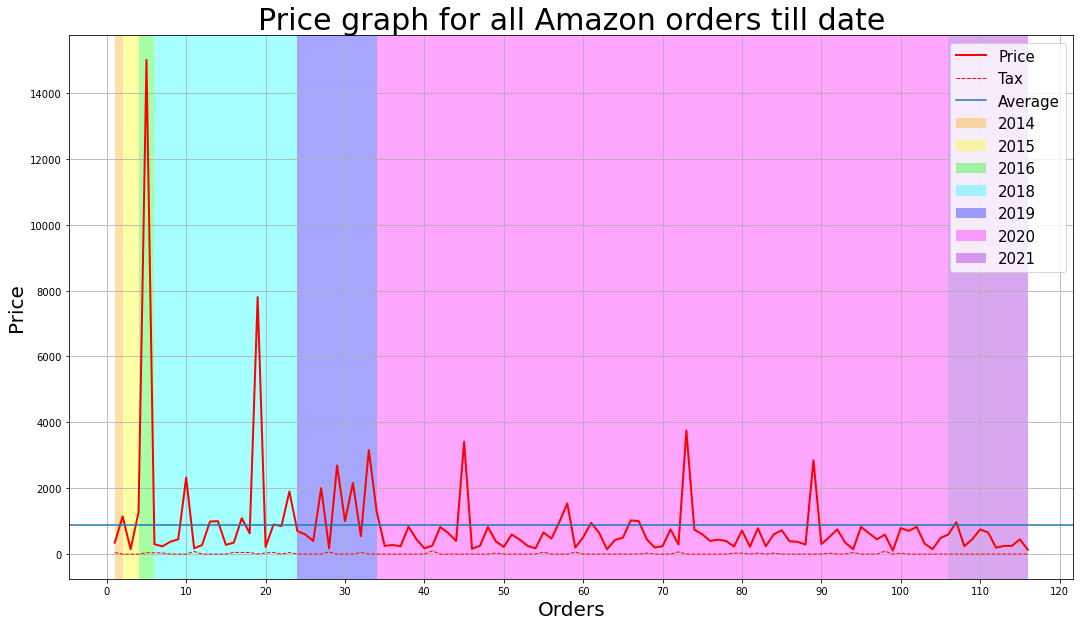

<Figure size 432x288 with 0 Axes>

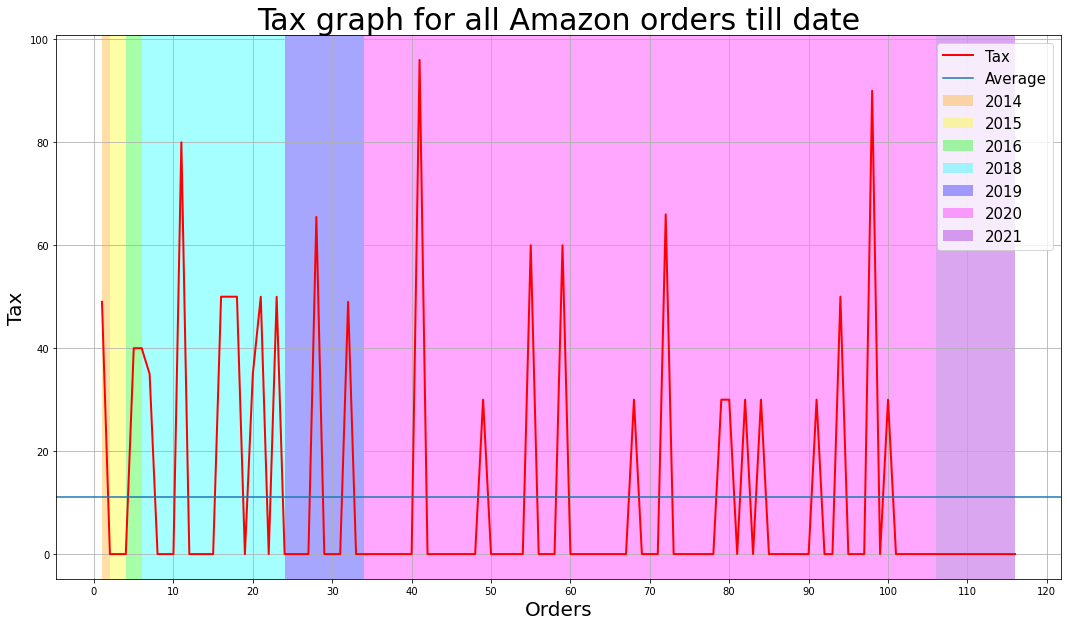

In [3]:
plt.figure(1)
plt.figure(figsize=(18, 10))
x_axis=np.linspace(1,total.size,total.size)
plt.plot(x_axis,total,'r', linewidth = 2)
plt.plot(x_axis,tax,'r--', linewidth = 1)
plt.axhline(y=int(mean), xmin=0, xmax=1)
plt.axvspan(min(x_axis), l1, color='orange', alpha=0.35, lw=0)
plt.axvspan(l1, l2, color='yellow', alpha=0.35, lw=0)
plt.axvspan(l2, l3, color='lime', alpha=0.35, lw=0)
plt.axvspan(l3, l4, color='cyan', alpha=0.35, lw=0)
plt.axvspan(l4, l5, color='blue', alpha=0.35, lw=0)
plt.axvspan(l5, l6, color='magenta', alpha=0.35, lw=0)
plt.axvspan(l6, l7, color='darkviolet', alpha=0.35, lw=0)
plt.title('Price graph for all Amazon orders till date', fontsize=30)
plt.ylabel('Price', fontsize=20)
plt.xlabel('Orders', fontsize=20)
plt.xticks(np.arange(min(x_axis)-1, max(x_axis)+10, 10))
plt.grid(b = True, alpha = 0.8, linewidth = 1)
plt.legend(['Price','Tax','Average','2014','2015','2016','2018','2019','2020','2021'], loc=1, fontsize=15)
plt.show()

plt.figure(2)
plt.figure(figsize=(18, 10))
x_axis=np.linspace(1,total.size,total.size)
plt.plot(x_axis,tax,'r', linewidth = 2)
plt.axhline(y=int(tax.mean()), xmin=0, xmax=1)
plt.axvspan(min(x_axis), l1, color='orange', alpha=0.35, lw=0)
plt.axvspan(l1, l2, color='yellow', alpha=0.35, lw=0)
plt.axvspan(l2, l3, color='lime', alpha=0.35, lw=0)
plt.axvspan(l3, l4, color='cyan', alpha=0.35, lw=0)
plt.axvspan(l4, l5, color='blue', alpha=0.35, lw=0)
plt.axvspan(l5, l6, color='magenta', alpha=0.35, lw=0)
plt.axvspan(l6, l7, color='darkviolet', alpha=0.35, lw=0)
plt.title('Tax graph for all Amazon orders till date', fontsize=30)
plt.ylabel('Tax', fontsize=20)
plt.xlabel('Orders', fontsize=20)
plt.xticks(np.arange(min(x_axis)-1, max(x_axis)+10, 10))
plt.grid(b = True, alpha = 0.8, linewidth = 1)
plt.legend(['Tax','Average','2014','2015','2016','2018','2019','2020','2021'], loc=1, fontsize=15)
plt.show()

<Figure size 432x288 with 0 Axes>

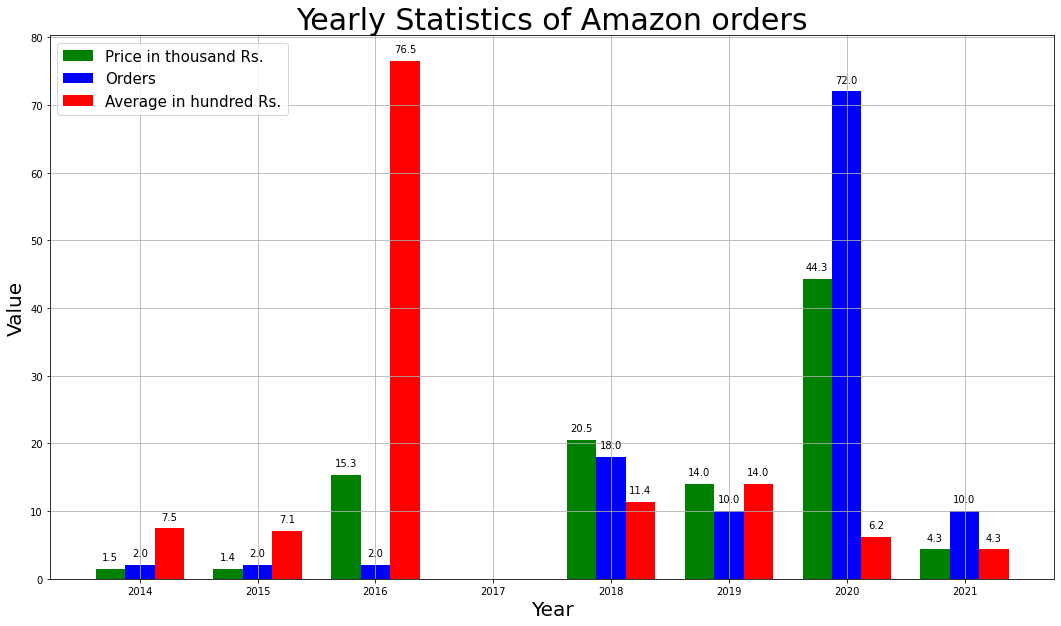

In [4]:
x = np.array([2014,2015,2016,2018,2019,2020,2021], dtype=np.float32)
orders = [df1.shape[0],df2.shape[0],df3.shape[0],df4.shape[0],df5.shape[0],df6.shape[0],df7.shape[0]]
price = [sum(df1['total'])/1000.00,sum(df2['total'])/1000.00,sum(df3['total'])/1000.00,sum(df4['total'])/1000.00,sum(df5['total'])/1000.00,sum(df6['total'])/1000.00,sum(df7['total'])/1000.00]
average = [sum(df1['total'])/orders[0]/100.00,sum(df2['total'])/orders[1]/100.00,sum(df3['total'])/orders[2]/100.00,sum(df4['total'])/orders[3]/100.00,sum(df5['total'])/orders[4]/100.00,sum(df6['total'])/orders[5]/100.00,sum(df7['total'])/orders[6]/100.00]
plt.figure(2)
plt.figure(figsize=(18, 10))
ax = plt.subplot(111)
r1 = ax.bar(x-0.25, price, width=0.25, color='g', align='center')
r2 = ax.bar(x, orders, width=0.25, color='b', align='center')
r3 = ax.bar(x+0.25, average, width=0.25, color='r', align='center')
plt.legend(['Price in thousand Rs.','Orders','Average in hundred Rs.'], loc=0, fontsize=15)
plt.grid(b = True, alpha = 0.8, linewidth = 1)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 1+height,'%0.1f' % float(height),ha='center', va='bottom')
plt.title('Yearly Statistics of Amazon orders', fontsize=30)
plt.ylabel('Value', fontsize=20)
plt.xlabel('Year', fontsize=20)
autolabel(r1)
autolabel(r2)
autolabel(r3)
plt.show()

In [5]:
# same for monthly: use date of purchace to split all rders into 12 months and plot the same thing

In [6]:
d1 = df.loc[df['date'].str[5:7] =='01']
d2 = df.loc[df['date'].str[5:7] =='02']
d3 = df.loc[df['date'].str[5:7] =='03']
d4 = df.loc[df['date'].str[5:7] =='04']
d5 = df.loc[df['date'].str[5:7] =='05']
d6 = df.loc[df['date'].str[5:7] =='06']
d7 = df.loc[df['date'].str[5:7] =='07']
d8 = df.loc[df['date'].str[5:7] =='08']
d9 = df.loc[df['date'].str[5:7] =='09']
d10 = df.loc[df['date'].str[5:7] =='10']
d11 = df.loc[df['date'].str[5:7] =='11']
d12 = df.loc[df['date'].str[5:7] =='12']

<Figure size 432x288 with 0 Axes>

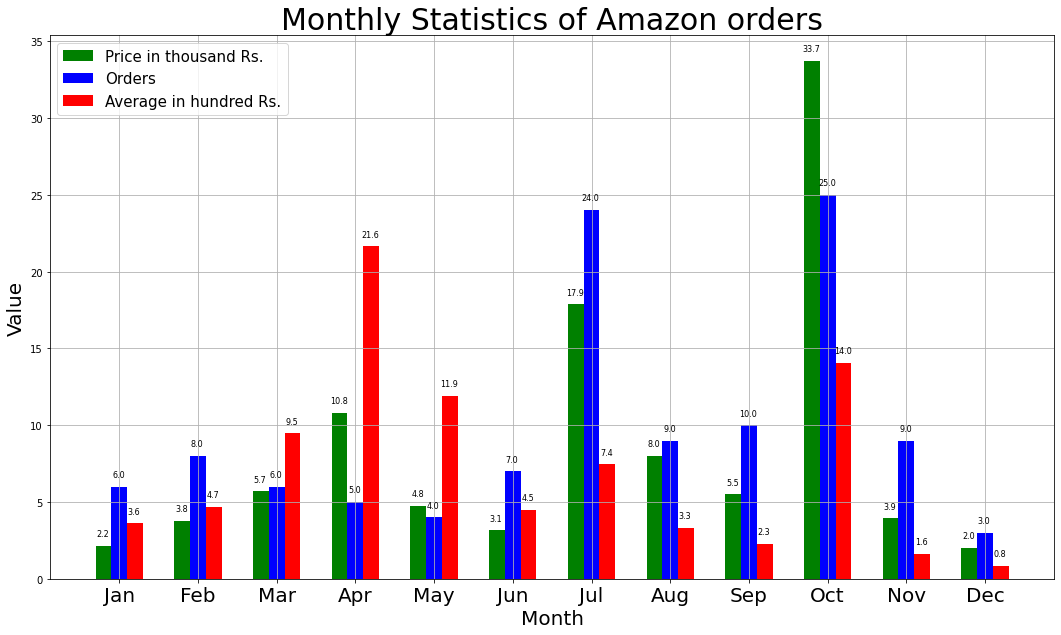

In [7]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12], dtype=np.float32)
x_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
orders = [d1.shape[0],d2.shape[0],d3.shape[0],d4.shape[0],d5.shape[0],d6.shape[0],d7.shape[0],d8.shape[0],d9.shape[0],d10.shape[0],d11.shape[0],d12.shape[0]]
price = [sum(d1['total'])/1000.00,sum(d2['total'])/1000.00,sum(d3['total'])/1000.00,sum(d4['total'])/1000.00,sum(d5['total'])/1000.00,sum(d6['total'])/1000.00,sum(d7['total'])/1000.00,sum(d8['total'])/1000.00,sum(d9['total'])/1000.00,sum(d10['total'])/1000.00,sum(d11['total'])/1000.00,sum(d12['total'])/1000.00]
average = [sum(d1['total'])/orders[0]/100.00,sum(d2['total'])/orders[1]/100.00,sum(d3['total'])/orders[2]/100.00,sum(d4['total'])/orders[3]/100.00,sum(d5['total'])/orders[4]/100.00,sum(d6['total'])/orders[5]/100.00,sum(d7['total'])/orders[6]/100.00,sum(d8['total'])/orders[6]/100.00,sum(d9['total'])/orders[6]/100.00,sum(d10['total'])/orders[6]/100.00,sum(d11['total'])/orders[6]/100.00,sum(d12['total'])/orders[6]/100.00]
plt.figure(2)
plt.figure(figsize=(18, 10))
ax = plt.subplot(111)
r1 = ax.bar(x-0.2, price, width=0.2, color='g', align='center')
r2 = ax.bar(x, orders, width=0.2, color='b', align='center')
r3 = ax.bar(x+0.2, average, width=0.2, color='r', align='center')
plt.legend(['Price in thousand Rs.','Orders','Average in hundred Rs.'], loc=0, fontsize=15)
plt.grid(b = True, alpha = 0.8, linewidth = 1)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2-0.01, 0.5+height,'%0.1f' % float(height),ha='center', va='bottom', fontsize=8)
plt.title('Monthly Statistics of Amazon orders', fontsize=30)
plt.ylabel('Value', fontsize=20)
plt.xlabel('Month', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_label, fontsize=20)
autolabel(r1)
autolabel(r2)
autolabel(r3)
plt.show()